## Introduction ##
by Ahmad Rafi Muzakki
Final Project 4 dengan menggunakan dataset credit card
Objektif pada dataset ini adalah memberikan clustering pada data dengan menggunakan machine learning

### Import Libraries ###

In [1]:
## Importing Pandas Libraries
import pandas as pd
import numpy as np

### Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

### For Train and Modelling the Data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

### Load the datasets ###

In [2]:
df = pd.read_csv(r'C:\Users\Acer\Documents\Hacktivist_Final Project\CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df.columns = [col.lower() for col in df.columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   cust_id                           8950 non-null   object 
 1   balance                           8950 non-null   float64
 2   balance_frequency                 8950 non-null   float64
 3   purchases                         8950 non-null   float64
 4   oneoff_purchases                  8950 non-null   float64
 5   installments_purchases            8950 non-null   float64
 6   cash_advance                      8950 non-null   float64
 7   purchases_frequency               8950 non-null   float64
 8   oneoff_purchases_frequency        8950 non-null   float64
 9   purchases_installments_frequency  8950 non-null   float64
 10  cash_advance_frequency            8950 non-null   float64
 11  cash_advance_trx                  8950 non-null   int64  
 12  purcha

In [5]:
df.describe()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.corr

<bound method DataFrame.corr of      cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      installments_purchases  cash_advance 

In [7]:
df.shape

(8950, 18)

### Data Cleansing ###

In [8]:
### Looking for the missing values ###
df.isnull().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [9]:
## Filling the missing values
df = df.fillna(df.mean())

C:\Users\Acer\AppData\Local\Temp/ipykernel_17764/1543592572.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [10]:
## Lets check again the missing values
df.isnull().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

In [11]:
## Duplicated files
df.duplicated().sum()

0

In [12]:
df.drop('cust_id', axis=1, inplace=True)


In [13]:
### In credit data, Sometimes we could find so many outliers
## before we proceed our exploration, lets try to remove the outlier first
range_df = df.copy()
range_df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [14]:
range_cols =['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'credit_limit', 'payments', 'minimum_payments']

In [15]:
# impute the range of 1 to 7 where column values is money

for i in range_cols:
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 500), i] = 1
    range_df.loc[(range_df[i] > 500) & (range_df[i] <= 1000), i] = 2
    range_df.loc[(range_df[i] > 1000) & (range_df[i] <= 3000), i] = 3
    range_df.loc[(range_df[i] > 3000) & (range_df[i] <= 5000), i] = 4
    range_df.loc[(range_df[i] > 5000) & (range_df[i] <= 7000), i] = 5
    range_df.loc[(range_df[i] > 7000) & (range_df[i] <= 10000), i] = 6
    range_df.loc[(range_df[i] > 10000), i] = 7

In [16]:
range_cols = ['balance_frequency', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 'cash_advance_frequency', 'prc_full_payment']

In [17]:
## Impute for the percentage values column

for i in range_cols:
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 0.1), i] = 1
    range_df.loc[(range_df[i] > 0.1) & (range_df[i] <= 0.2), i] = 2
    range_df.loc[(range_df[i] > 0.2) & (range_df[i] <= 0.3), i] = 3
    range_df.loc[(range_df[i] > 0.3) & (range_df[i] <= 0.4), i] = 4
    range_df.loc[(range_df[i] > 0.4) & (range_df[i] <= 0.5), i] = 5
    range_df.loc[(range_df[i] > 0.5) & (range_df[i] <= 0.6), i] = 6
    range_df.loc[(range_df[i] > 0.6) & (range_df[i] <= 0.7), i] = 7
    range_df.loc[(range_df[i] > 0.7) & (range_df[i] <= 0.8), i] = 8
    range_df.loc[(range_df[i] > 0.8) & (range_df[i] <= 0.9), i] = 9
    range_df.loc[(range_df[i] > 0.9) & (range_df[i] <= 1), i] = 10

In [18]:
range_cols = ['cash_advance_trx', 'purchases_trx']

In [19]:
# Impute the range of 1 to 10 to the other columns

for i in range_cols:
    range_df.loc[(range_df[i] > 0) & (range_df[i] <= 5), i] = 1
    range_df.loc[(range_df[i] > 5) & (range_df[i] <= 10), i] = 2
    range_df.loc[(range_df[i] > 10) & (range_df[i] <= 20), i] = 3
    range_df.loc[(range_df[i] > 20) & (range_df[i] <= 40), i] = 4
    range_df.loc[(range_df[i] > 40) & (range_df[i] <= 70), i] = 5
    range_df.loc[(range_df[i] > 70) & (range_df[i] <= 100), i] = 6
    range_df.loc[(range_df[i] > 100) & (range_df[i] <= 150), i] = 7
    range_df.loc[(range_df[i] > 150) & (range_df[i] <= 200), i] = 8
    range_df.loc[(range_df[i] > 200) & (range_df[i] <= 300), i] = 9
    range_df.loc[(range_df[i] > 300), i] = 10

In [20]:
range_df

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1.0,9.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,0,1,2.0,1.0,1.0,0.0,12
1,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,1,0,5.0,4.0,3.0,3.0,12
2,3.0,10.0,2.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0,3,6.0,2.0,2.0,0.0,12
3,3.0,7.0,3.0,3.0,0.0,1.0,10.0,10.0,0.0,10.0,1,1,6.0,0.0,2.0,0.0,12
4,2.0,10.0,1.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0,1,3.0,2.0,1.0,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,1.0,10.0,1.0,0.0,1.0,0.0,10.0,0.0,9.0,0.0,0,2,2.0,1.0,1.0,5.0,6
8946,1.0,10.0,1.0,0.0,1.0,0.0,10.0,0.0,9.0,0.0,0,2,2.0,1.0,2.0,0.0,6
8947,1.0,9.0,1.0,0.0,1.0,0.0,9.0,0.0,7.0,0.0,0,1,2.0,1.0,1.0,3.0,6
8948,1.0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1,0,1.0,1.0,1.0,3.0,6


## Exploratory Data Analysis ##

In [21]:
range_df.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure
0,1.0,9.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,0,1,2.0,1.0,1.0,0.0,12
1,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,1,0,5.0,4.0,3.0,3.0,12
2,3.0,10.0,2.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0,3,6.0,2.0,2.0,0.0,12
3,3.0,7.0,3.0,3.0,0.0,1.0,10.0,10.0,0.0,10.0,1,1,6.0,0.0,2.0,0.0,12
4,2.0,10.0,1.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0,1,3.0,2.0,1.0,0.0,12


In [22]:
range_df.columns

Index(['balance', 'balance_frequency', 'purchases', 'oneoff_purchases',
       'installments_purchases', 'cash_advance', 'purchases_frequency',
       'oneoff_purchases_frequency', 'purchases_installments_frequency',
       'cash_advance_frequency', 'cash_advance_trx', 'purchases_trx',
       'credit_limit', 'payments', 'minimum_payments', 'prc_full_payment',
       'tenure'],
      dtype='object')

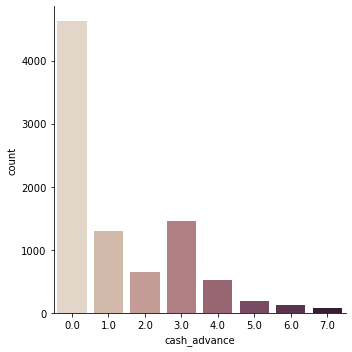

In [23]:
sns.catplot(data=range_df, x="cash_advance", kind="count", palette="ch:.24")

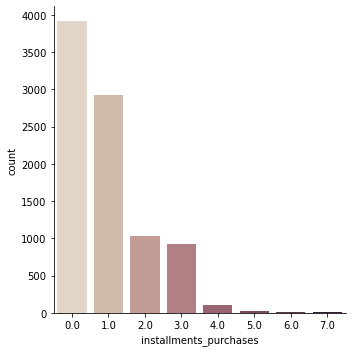

In [24]:
sns.catplot(data=range_df, x="installments_purchases", kind="count", palette="ch:.24")

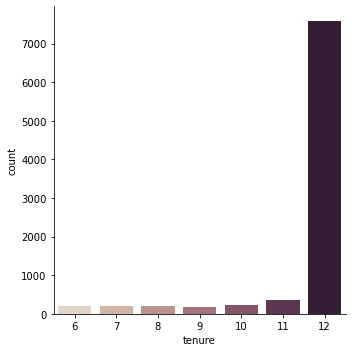

In [25]:
sns.catplot(data=range_df, x="tenure", kind="count", palette="ch:.24")

<AxesSubplot:>

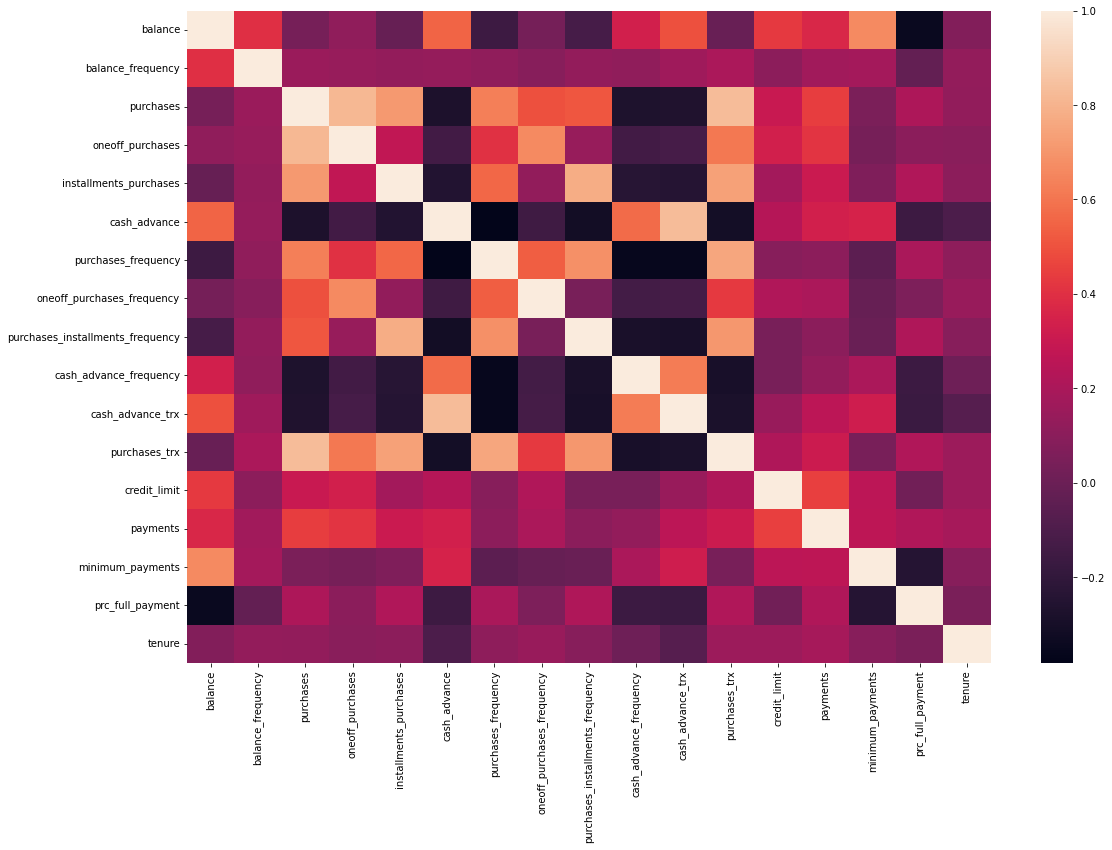

In [26]:
correlated_data = range_df.corr()

plt.figure(figsize=(18,12))
sns.heatmap(correlated_data, annot=False)

## Data Preprocessing ##

In [27]:
## Before clustering, i want to try knn model based on purchase
x = range_df.drop(['purchases'], axis=1)
y = range_df['purchases']

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Modelling ###

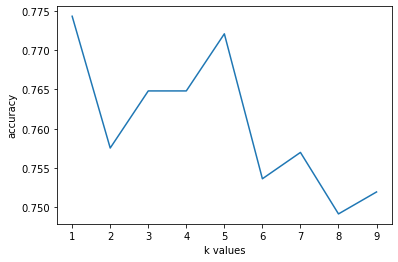

In [29]:
#find k value
score_list=[]
for each in range(1,10):
        knn=KNeighborsClassifier(n_neighbors=each)
        knn.fit(x_train,y_train)
        score_list.append(knn.score(x_test,y_test))
        
plt.plot(range(1,10),score_list)
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

In [30]:
### Now Lets use knn model for our test
## and we will use 5 
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
print("{} nn score:{}".format(3,knn.score(x_test,y_test)))

3 nn score:0.7720670391061453


Cross Validation Values: 9


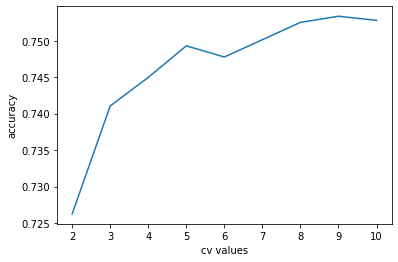

In [31]:
## Trying K fold cross validation with knn
score_list = []
for cv in range(2, 11):
        knn_tuning = KNeighborsClassifier(n_neighbors=5)
        accuracies = cross_val_score(estimator=knn_tuning, X=x_train,y=y_train, cv=cv)
        mean_accuracy = np.mean(accuracies)
        score_list.append(mean_accuracy)
best_cv = np.argmax(score_list) + 2
print("Cross Validation Values:", best_cv)
    
plt.plot(range(2,11),score_list)
plt.xlabel("cv values")
plt.ylabel("accuracy")
plt.show()

In [32]:
accuracies = cross_val_score(knn_tuning, X=x_train,y=y_train, cv=9)
accuracies

array([0.74371859, 0.7701005 , 0.74874372, 0.73869347, 0.75376884,
       0.7509434 , 0.75597484, 0.76352201, 0.75471698])

In [33]:
accuracies = cross_val_score(knn_tuning, X=x_train,y=y_train, cv=9)
print("mean_accuracy:", np.mean(accuracies))
print("mean_std:",np.std(accuracies))
knn_tuning.fit(x_train,y_train)
print("test accuracy:",knn_tuning.score(x_test,y_test))

mean_accuracy: 0.7533535953702826
mean_std: 0.008991171266826612
test accuracy: 0.7720670391061453


# The cross validation score that we get is 75%
# With this credit card datasets, we can build some clustering model 

In [34]:
# normalizing the datas

scale = StandardScaler()
X = scale.fit_transform(range_df)

In [35]:
# reducing dimensionality with PCA

pca = PCA(2)
cosine = cosine_similarity(X)

pca_results = pca.fit_transform(cosine)
pca_results.shape

(8950, 2)

In [36]:
n_clusters=30
cost=[]
for i in range(1,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    cost.append(kmean.inertia_) 

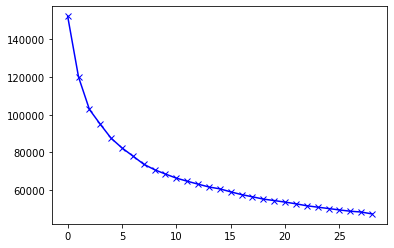

In [37]:
plt.plot(cost, 'bx-')

In [38]:
## Then we found there are 6 cluster between 0 and 25
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

In [39]:
clusters=pd.concat([range_df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,cluster
0,1.0,9.0,1.0,0.0,1.0,0.0,2.0,0.0,10.0,0.0,0,1,2.0,1.0,1.0,0.0,12,5
1,4.0,10.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,1,0,5.0,4.0,3.0,3.0,12,3
2,3.0,10.0,2.0,2.0,0.0,0.0,10.0,10.0,0.0,0.0,0,3,6.0,2.0,2.0,0.0,12,2
3,3.0,7.0,3.0,3.0,0.0,1.0,10.0,10.0,0.0,10.0,1,1,6.0,0.0,2.0,0.0,12,2
4,2.0,10.0,1.0,1.0,0.0,0.0,10.0,10.0,0.0,0.0,0,1,3.0,2.0,1.0,0.0,12,2


In [40]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

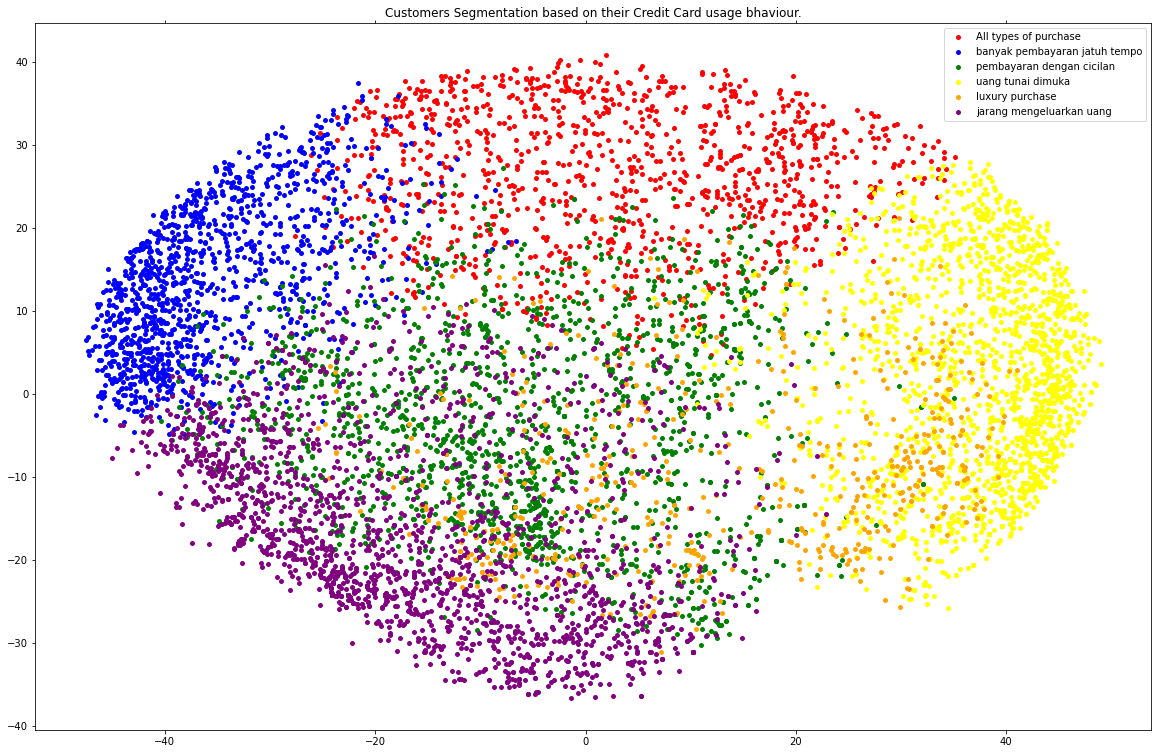

In [41]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'All types of purchase', 
         1: 'banyak pembayaran jatuh tempo', 
         2: 'pembayaran dengan cicilan', 
         3: 'uang tunai dimuka', 
         4: 'luxury purchase',
         5: 'jarang mengeluarkan uang'}
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()